# Respuestas A Las Preguntas DataSet Anterior


a) ¿Qué significa que la desviación estándar es casi dos veces mayor que la MAD?

La desviación estándar mide la dispersión de los datos considerando todas las observaciones, siendo muy sensible a valores extremos. En cambio, la mediana de las diferencias absolutas evalúa la dispersión en relación con la mediana y es más resistente a los valores atípicos. Si la SD es aproximadamente el doble de la MAD, sugiere que los datos presentan una distribución con colas largas o valores extremos que incrementan la variabilidad.

b) ¿Cómo puedo mejorar esta situación?

Para reducir la diferencia entre la SD y la MAD, se pueden aplicar varias estrategias:

Identificar y mitigar el impacto de valores atípicos mediante técnicas como la winsorización o transformaciones matemáticas (logarítmicas, raíz cuadrada, etc.).

Priorizar medidas más robustas, como la MAD, en análisis donde los valores atípicos afectan significativamente los resultados.

Aplicar normalización o transformaciones de datos para ajustar la distribución y hacerla más simétrica.

c) Explique el resultado obtenido al calcular el IQR (Rango Intercuartílico).

El IQR representa la dispersión de los datos centrales al calcular la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). Si el IQR es pequeño, indica que la mayoría de los datos están cercanos a la mediana, mostrando baja variabilidad. Por el contrario, un IQR amplio señala que los datos presentan mayor dispersión en la zona central de la distribución. Además, el IQR es útil para detectar valores atípicos utilizando la regla de 1.5 veces su valor.

d) ¿Qué información nos suministran los percentiles de la tasa de homicidios por estados?

Los percentiles permiten analizar la distribución de las tasas de homicidios en los distintos estados:

El 25% de los estados tienen tasas inferiores a 2.425.

El 50% de los estados (mediana) tienen tasas menores a 4.000.

El 75% de los estados presentan tasas menores a 5.550, lo que implica que solo un 25% tiene valores superiores.

Estos valores reflejan que la mayoría de los estados tienen tasas de homicidio relativamente bajas, aunque hay algunos con cifras significativamente elevadas.

e) ¿Qué información suministra el diagrama de caja con respecto a la tasa de homicidios por estado?

El diagrama de caja proporciona información clave sobre la distribución de las tasas de homicidio:

La mediana, ubicada cerca de 4.0, confirma que la mayoría de los estados tienen tasas relativamente bajas.

El rango intercuartílico (IQR) abarca desde 2.425 hasta 5.550, indicando que la mayoría de los datos se encuentran en ese intervalo.

Los valores atípicos aparecen como puntos fuera de los bigotes del diagrama, representando estados con tasas de homicidio excepcionalmente altas.

f) ¿Cómo podrían clasificarse los estados según los intervalos definidos?

Podemos agrupar los estados en cuatro categorías según sus tasas de homicidio:

Baja (≤ Q1, ≤ 2.425): Connecticut, Hawaii, Idaho, Iowa, Maine, Massachusetts, Minnesota, New Hampshire, North Dakota, Oregon, Rhode Island, South Dakota, Utah, Vermont, Washington, Wisconsin.

Media-Baja (Q1 - Q2, 2.425 - 4.000): Colorado, Kansas, Kentucky, Montana, Nebraska, New Jersey, New York, North Carolina, Ohio, Pennsylvania, Virginia, West Virginia, Wyoming.

Media-Alta (Q2 - Q3, 4.000 - 5.550): Arizona, California, Illinois, Indiana, Michigan, Missouri, Nevada, South Carolina, Tennessee, Texas.

Alta (> Q3, > 5.550): Alabama, Alaska, Arkansas, Delaware, Florida, Georgia, Louisiana, Maryland, Mississippi, New Mexico, Oklahoma.



# Análisis DataSet


Mounted at /content/drive
                        Age    Items   Monthly Income  Transaction Time  \
Media                 40.085    7.885    1.596289e+04           497.430   
Mediana               40.000    8.000    1.576400e+04           495.098   
Desviación estándar   11.973    4.283    8.046517e+03           286.065   
Varianza             143.363   18.344    6.474644e+07         81833.268   
Mínimo                20.000    1.000    2.003000e+03             0.463   
Máximo                60.000   15.000    3.000000e+04          1000.697   
Rango                 40.000   14.000    2.799700e+04          1000.234   
Q1 (25%)              30.000    4.000    9.086750e+03           253.444   
Q2 (50%) (Mediana)    40.000    8.000    1.576400e+04           495.098   
Q3 (75%)              51.000   12.000    2.305675e+04           745.834   
IQR (Q3 - Q1)         21.000    8.000    1.397000e+04           492.390   
Trim Mean (10%)       40.078    7.861    1.594433e+04           497.105   

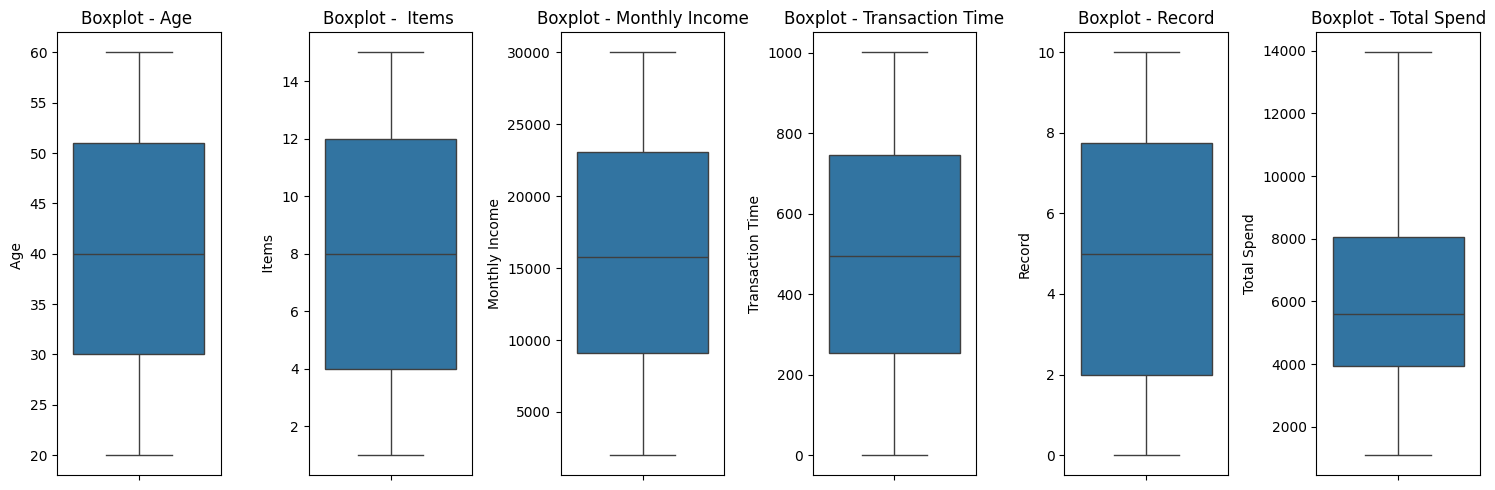

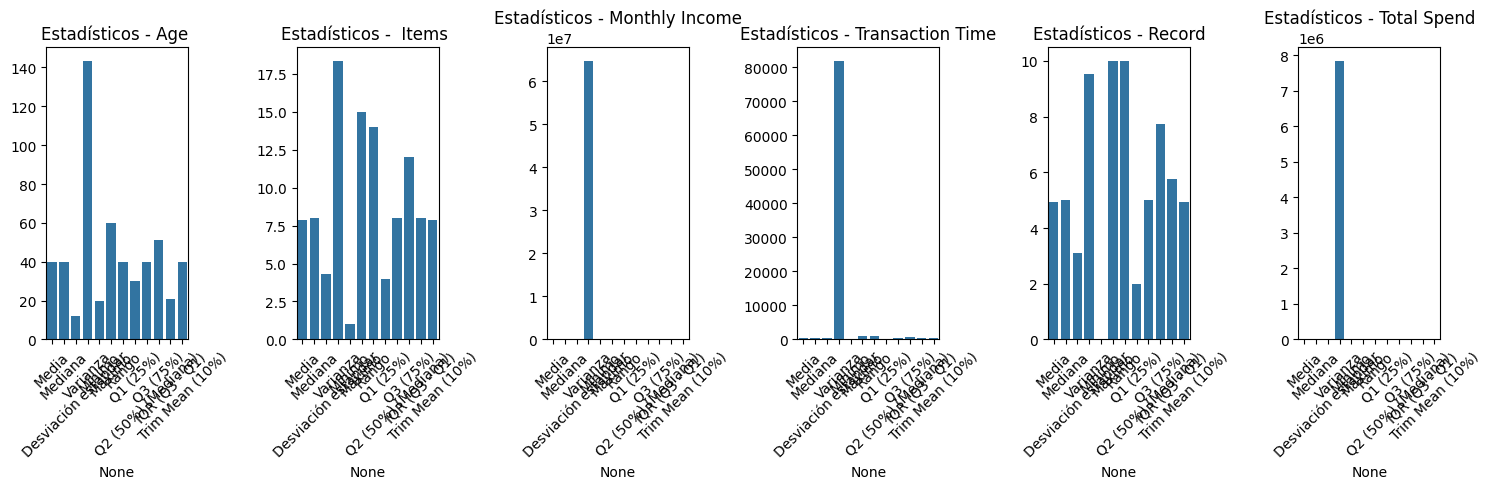

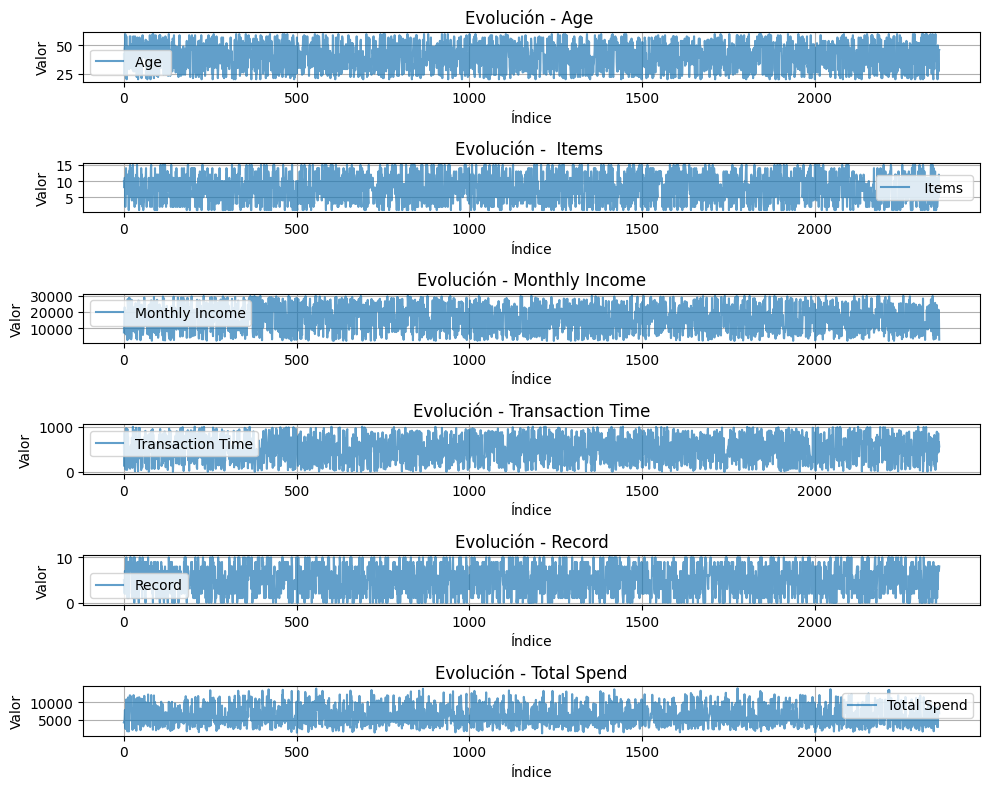

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import trim_mean
import pandas as pd

#Cargar dato desde google drive
from google.colab import drive
drive.mount("/content/drive")

df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ecom_Expense.csv")

# Filtrar solo columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number])

# Función para calcular estadísticos
def calcular_estadisticos(columna):
    return pd.Series({
        "Media": round(columna.mean(), 3),
        "Mediana": round(columna.median(), 3),
        "Desviación estándar": round(columna.std(), 3),
        "Varianza": round(columna.var(), 3),
        "Mínimo": round(columna.min(), 3),
        "Máximo": round(columna.max(), 3),
        "Rango": round(columna.max() - columna.min(), 3),
        "Q1 (25%)": round(columna.quantile(0.25), 3),
        "Q2 (50%) (Mediana)": round(columna.median(), 3),
        "Q3 (75%)": round(columna.quantile(0.75), 3),
        "IQR (Q3 - Q1)": round(columna.quantile(0.75) - columna.quantile(0.25), 3),
        "Trim Mean (10%)": round(trim_mean(columna, proportiontocut=0.1), 3)
    })

# Crear tabla de resultados
tabla_estadisticos = numeric_cols.apply(calcular_estadisticos)

# Mostrar resultados
print(tabla_estadisticos)

# Crear boxplots
fig, axes = plt.subplots(1, len(numeric_cols.columns), figsize=(15, 5))
for ax, col in zip(axes, numeric_cols.columns):
    sns.boxplot(y=numeric_cols[col], ax=ax)
    ax.set_title(f"Boxplot - {col}")
plt.tight_layout()
plt.show()

# Crear gráficos de barras para estadísticas clave
fig, axes = plt.subplots(1, len(numeric_cols.columns), figsize=(15, 5))
for ax, col in zip(axes, numeric_cols.columns):
    estadisticos = calcular_estadisticos(numeric_cols[col])
    sns.barplot(x=estadisticos.index, y=estadisticos.values, ax=ax)
    ax.set_title(f"Estadísticos - {col}")
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Crear gráficos de línea para evolución de valores
fig, axes = plt.subplots(len(numeric_cols.columns), 1, figsize=(10, 8))
for ax, col in zip(axes, numeric_cols.columns):
    x_values = np.arange(len(numeric_cols[col]))
    ax.plot(x_values, numeric_cols[col], label=col, alpha=0.7)
    ax.set_title(f"Evolución - {col}")
    ax.set_xlabel("Índice")
    ax.set_ylabel("Valor")
    ax.legend()
    ax.grid(True)
plt.tight_layout()
plt.show()
